In [49]:
import os
import pandas as pd
import numpy as np

In [50]:
data_dir=r"C:\Users\Swastik\Desktop\Dono Consulting\Deloitte_Training\decision-tree"

In [51]:
os.chdir(data_dir)

In [52]:
dat=pd.read_csv("credit_history.csv")
dat.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


We will try to predict this column called default. Now think of this data set as a data set belonging to a credit card company where the company might want to understand what is causing the default in their customers.

In [53]:
dat.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [54]:
dat['years'].describe()

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

In [55]:
dat['years'].fillna(4,inplace=True)

In [56]:
X=dat.drop("default",axis=1)

In [57]:
X.head()

,amount,grade,years,ownership,income,age
0,1000,B,2.0,RENT,19200.0,24
1,6500,A,2.0,MORTGAGE,66000.0,28
2,2400,A,2.0,RENT,60000.0,36
3,10000,C,3.0,RENT,62000.0,24
4,4000,C,2.0,RENT,20000.0,28


In [58]:
X=pd.get_dummies(X)

In [59]:
X.head()

,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,1000,2.0,19200.0,24,0,1,0,0,0,0,0,0,0,0,1
1,6500,2.0,66000.0,28,1,0,0,0,0,0,0,1,0,0,0
2,2400,2.0,60000.0,36,1,0,0,0,0,0,0,0,0,0,1
3,10000,3.0,62000.0,24,0,0,1,0,0,0,0,0,0,0,1
4,4000,2.0,20000.0,28,0,0,1,0,0,0,0,0,0,0,1


In [60]:
y=dat['default']

In [61]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [62]:
import sklearn.tree as tree
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.6274256144890039

In [63]:
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.6721250820352787

The area under the curve turns out to be .67, which is more than. 50 so definitely, my decision tree model is better than a naive classifier, now after we have built this decision tree model, the next thing we might want to do is we might want to visualize a decision tree that we have just created. Now in order to visualize the decision tree, we will need to make use of a couple of packages.

One of the packages we will need to make use of is called pydotplus. This package is not a part of standard anaconda installations, so you will have to install it separately.

The second piece of software that we need to visualize the decision trees is called graphviz. If you are working on a windows machine, you will have to explicitly install graphviz, you can just google search about graphviz and you will be able to reach to a page where you can download graphviz. Now after you download graphviz, unlike other pieces of software, the binaries of the graphviz package are not appended to the path variable. So either you can manually append the binaries of the graphviz installation to your path variable or you can also programmatically do this

Now I will use my trained model which is stored in the object clf, to create a representation of my model, that can be further used to create a visual output of my trained tree model.

we will use this method called export_ graphviz, which is part of the tree module. This method accepts a couple of parameters.

A trained model is one of the parameters. The other two important parameters are called feature_names , to this I am passing the column names in my predictor matrix and I have another parameter, if in case you are building a classification tree, you will need to talk about what are the classes in your data set, so if you remember in my target variable, I had only two classes, 0 & 1 which are what I am specifying here.

create a graph representation from this object

In [64]:
import pydotplus
import graphviz
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
os.chdir(data_dir)

In [65]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

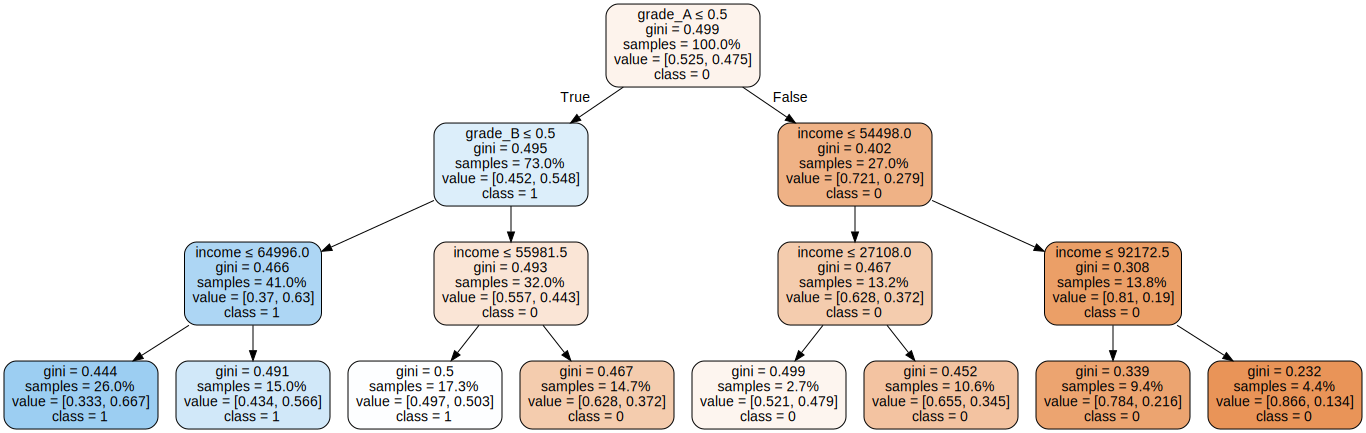

In [66]:
graph = graphviz.Source(dot_data, format="png") 
graph

In [67]:
graph.render('dt_classifier',view=True)

'dt_classifier.png'

This is the visual representation of my tree model. Now the first split is occurring on the variable called grade A. Now if you remember, grade A was a one hot encoded variable. So grade A less than equal to 0.5 indicates that the person does not have a grade A, if a person does not have a grade A, then we move in this direction and we reach here, this means all the values where people do not have a grade A as well as a grade B, and I reach to this node and this node specifies if a person has an income of less than this number, then I reach to these two decision nodes. Now you can see that in each of my decision nodes, I have the class proportions and it is also specified which is a majority class, for example here, the majority class is 1 while here, the majority class is 0. You can see some numbers here, for example, 15.0%, this talks about the percentage of total data that resides in this particular node. I have also the gini number, or the gini measure for this particular node.

### Grid Search-Cross Validation

In [68]:
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)

In [69]:
mod=model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, random_state=200),
             param_grid={'max_depth': [2, 3, 4, 5, 6]})

In [70]:
mod.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=200)

In [71]:
mod.best_score_

0.6314528049645112